<a href="https://colab.research.google.com/github/jittakorn-ch/DWDM21/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project กลุ่ม
- present วันที่ 31 สิงหาคม 2564
- ข้อมูลที่ไปดึงมาจาก 3 แหล่ง
- แสดงวิธีการโหลด
- ความเชื่อมโยงของ 3 ตาราง (index)

ที่มาของข้อมูล : https://www.kaggle.com/olistbr/brazilian-ecommerce

เป็นข้อมูลของบริษัท Olist เป็นบริษัทขายสินค้าของประเทศบราซิล (คล้ายๆ lazada)


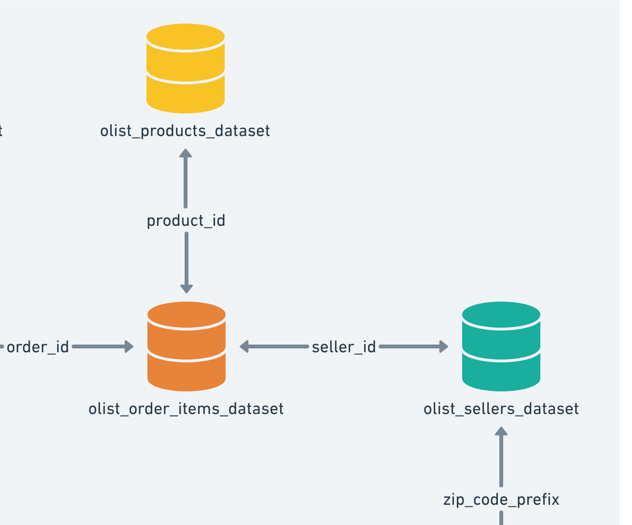

In [ ]:
import pandas as pd               ### สำหรับข้อมูลลักษณะ ตาราง

In [ ]:
from google.colab import drive   ### เชื่อมต่อ drive
drive.mount('/content/drive')    ### คลิกลิ้ง -> เลือก E-mail -> ลงชื่อ -> ก็อปโค้ด -> นำกลับมาวาง -> enter

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os                      ### จัดการไฟล์และ path

In [ ]:
path = '/content/drive/My Drive/DWDM2021_DATA'

## ตาราง sellers

เป็นตารางที่เกี่ยวกับผู้ขายสินค้า ที่ขายสินค้าใน Olist

In [ ]:
sellers = pd.read_csv(os.path.join(path,'olist_sellers_dataset.csv'))
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**seller_id** คือ PK ของตาราง

**seller_zip_code_prefix** คือ FK (รหัสไปษณีย์ 5 หลักแรกของผู้ขาย) 

**seller_city** คือ ชื่อเมืองผู้ขาย

**seller_state** คือ ชื่อรัฐผู้ขาย  

In [ ]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

sellers.isnull().any()

seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool

## ตาราง order_items

ข้อมูลเกี่ยวกับสินค้าที่ซื้อในแต่ละคำสั่งซื้อ

In [ ]:
order_items = pd.read_csv(os.path.join(path,'olist_order_items_dataset.csv'))
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**order_id** คือ PK

**order_item_id** คือ หมายเลขลำดับระบุจำนวนรายการที่รวมอยู่ในลำดับเดียวกัน

**product_id** คือ FK (เป็น PK ของตาราง products)

**seller_id** คือ FK (เป็น PK ของตาราง sellers)

**shipping_limit_date** คือ กำหนดการ deadline วันส่งสินค้าของผู้ขายให้กับบริษัทขนส่ง

**price** คือ ราคาสินค้า

**freight_value** คือ ค่าจัดส่ง

In [ ]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

order_items.isnull().any()

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

## ตาราง products

ข้อมูลเกี่ยวกับผลิตภัณฑ์ที่ขายใน Olist

In [ ]:
products = pd.read_csv(os.path.join(path,'olist_products_dataset.csv'))
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**product_id** คือ PK

**product_category_name** คือ ชื่อหมวดหมู่สินค้า (ภาษาโปรตุเกส)

**product_name_lenght** คือ จำนวนอักษรของชื่อสินค้า

**product_description_lenght** คือ จำนวนอักษรของคำอธิบายสินค้า

**product_photos_qty** คือ จำนวนรูปภาพที่เผยแพร่ของสินค้า

**product_weight_g** คือ น้ำหนักของสินค้า (g)

**product_length_cm** คือ ความยาวของสินค้า (cm)

**product_height_cm** คือ ความสูงของสินค้า (cm)

**product_width_cm** คือ ความกว้างของสินค้า (cm)


In [ ]:
products.isnull().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [ ]:
### function หา % ของข้อมูลที่จะหายไปถ้า .dropna()

def loss_data(data):
    im = data.shape[0]
    jm = data.dropna().shape[0]
    km = im - jm
    print(f'size before drop = {im}')
    print(f'size after drop = {jm}')
    print(f'we loss {km*100/im} % of data')

In [ ]:
loss_data(products)

size before drop = 32951
size after drop = 32340
we loss 1.8542684592273375 % of data


In [ ]:
products_dropped = products.dropna()
products_dropped

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## ต่อตาราง

In [ ]:
### ต่อตาราง order_items กับ sellers

merged_ori_sellers = order_items.merge(sellers,how='left',left_on='seller_id',right_on='seller_id')
merged_ori_sellers

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP


In [ ]:
### ต่อตาราง order_items, sellers, products

merged_ori_sellers_pro = merged_ori_sellers.merge(products_dropped,how='left',left_on='product_id',right_on='product_id')
merged_ori_sellers_pro

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

merged_ori_sellers_pro.isnull().any()

order_id                      False
order_item_id                 False
product_id                    False
seller_id                     False
shipping_limit_date           False
price                         False
freight_value                 False
seller_zip_code_prefix        False
seller_city                   False
seller_state                  False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [ ]:
loss_data(merged_ori_sellers_pro)

size before drop = 112650
size after drop = 111046
we loss 1.4238792720816689 % of data


In [ ]:
merged_ori_sellers_pro_nomissing = merged_ori_sellers_pro.dropna()
merged_ori_sellers_pro_nomissing

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,88303,itajai,SC,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1206,sao paulo,SP,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,80610,curitiba,PR,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,4733,sao paulo,SP,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
### ดูว่าแต่ละ column มีค่า missing มั้ย

merged_ori_sellers_pro_nomissing.isnull().any()

order_id                      False
order_item_id                 False
product_id                    False
seller_id                     False
shipping_limit_date           False
price                         False
freight_value                 False
seller_zip_code_prefix        False
seller_city                   False
seller_state                  False
product_category_name         False
product_name_lenght           False
product_description_lenght    False
product_photos_qty            False
product_weight_g              False
product_length_cm             False
product_height_cm             False
product_width_cm              False
dtype: bool